<a href="https://colab.research.google.com/github/ganochan/statistical_analysis_with_python_Lern/blob/main/cha3_scores_em.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2次元データの整理
一人の生徒に二つの点数が対応している2次元のデータの整理方法を学習する。

In [ ]:
# 事前準備
import numpy as np
import pandas as pd

%precision 3
pd.set_option('precision', 3)

In [ ]:
df = pd.read_csv('drive/MyDrive/python_stat_sample-data/ch2_scores_em.csv', index_col='生徒番号')
df.head()

,英語,数学
生徒番号,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [ ]:
# DataFrameを作成する
en_scores = np.array(df['英語'])[:10]
ma_scores = np.array(df['数学'])[:10]

scores_df = pd.DataFrame({'英語':en_scores, '数学':ma_scores}, index=pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name='生徒'))
scores_df

,英語,数学
生徒,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


# 2つのデータの関係性の指標
正の相関：英語の点数が高い人ほど、数学の点数が高い
負の相関：英語の点数が高い人ほど、数学の点数が低い
無相関：英語の点数が数学の点数に直接的な影響を及ぼさないとき

## 共分散
DataFrameでまとめつつ、共分散を計算してみる。

In [20]:
summary_df = scores_df.copy()
summary_df['英語の偏差'] =\
    summary_df['英語'] - summary_df['英語'].mean()
summary_df['数学の偏差'] =\
    summary_df['数学'] - summary_df['数学'].mean()
summary_df['偏差同士の積'] =\
    summary_df['英語の偏差'] * summary_df['数学の偏差']
summary_df

,英語,数学,英語の偏差,数学の偏差,偏差同士の積
生徒,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [21]:
# 共分散：偏差同士の積の平均（数値が正なら正の相関、負ならば負の相関、0ならば無相関）
summary_df['偏差同士の積'].mean()

62.800

In [22]:
# NumPyで共分散を求めるcov関数
# 返り値は共分散行列（covariance matrix）または分散共分散行列（variance covariance matrix）と呼ばれる行列
cov_mat = np.cov(en_scores, ma_scores, ddof = 0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

上記行列は1行目と1列目が英語、2行目と2列目が数学に対応

## 相関係数
相関係数（correlation coefficient）：単位に依存しない相関を表す指標

各データの標準偏差を割った値

In [23]:
# 英語と数学の点数の相関係数を求める
np.cov(en_scores, ma_scores, ddof=0)[0, 1] /\
    (np.std(en_scores) * np.std(ma_scores))

0.819

In [24]:
# NumPyのcorrcoef関数で相関係数を計算する。
# 返り値は相関行列（correlation matrix）と呼ばれる行列
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [25]:
# DataFrameの場合、corrメソッドを使う
scores_df.corr()

,英語,数学
英語,1.000,0.819
数学,0.819,1.000


# 2次元データの視覚化


In [26]:
# Matplotlibの準備
import matplotlib.pyplot as plt

%matplotlib inline

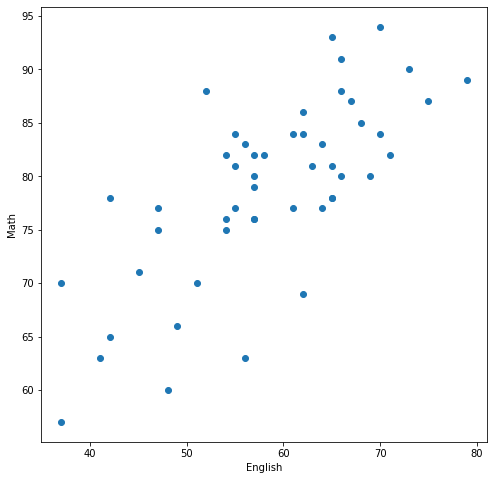

In [28]:
english_scores = np.array(df['英語'])
math_scores = np.array(df['数学'])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
#散布図
ax.scatter(english_scores, math_scores)
ax.set_xlabel('English')
ax.set_ylabel('Math')

plt.show()

## 回帰直線
回帰直線（regression line）：2つのデータ間の関係性を表現する直線

Matplotlibには回帰直線を描画するメソッドがないため、NumPyを使って回帰直線を求める。（np.polyfit関数とnp.poly1d関数を使う）

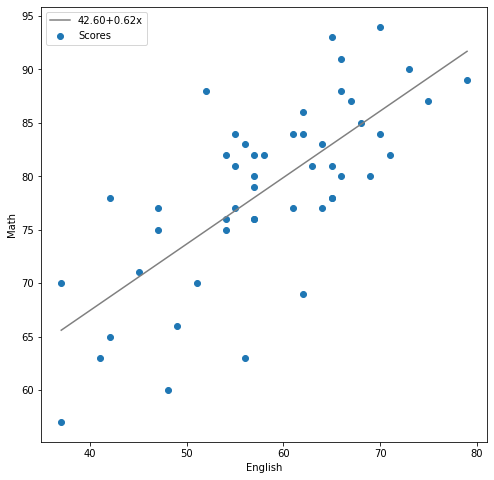

In [30]:
# 回帰直線と散布図を一緒に描画する
# 係数β_0とβ_1を求める
poly_fit = np.polyfit(english_scores, math_scores,1)
# β_0＋β_1 xを返す関数を作る
poly_1d = np.poly1d(poly_fit)
# 直線を描画するためのx座標を作る
xs = np.linspace(english_scores.min(), english_scores.max())
# xsに対応するy座標を求める
ys = poly_1d(xs)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_xlabel('English')
ax.set_ylabel('Math')
ax.scatter(english_scores, math_scores, label='Scores')
ax.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
# 凡例の表示
ax.legend(loc='upper left')

plt.show()

## ヒートマップ
ヒストグラムの2次元版を色によってあらわすことができるグラフ。

hist2dメソッドによって作ることが可能。引数もほどんどhistメソッドと同じ。

色の濃い領域ほど多くの人が分布していることを表す。

* 英語の点数は35点から80点まで5点刻み
* 数学の点数は55点から95点まで5点刻み

になるよう、binsとrangeを指定する。

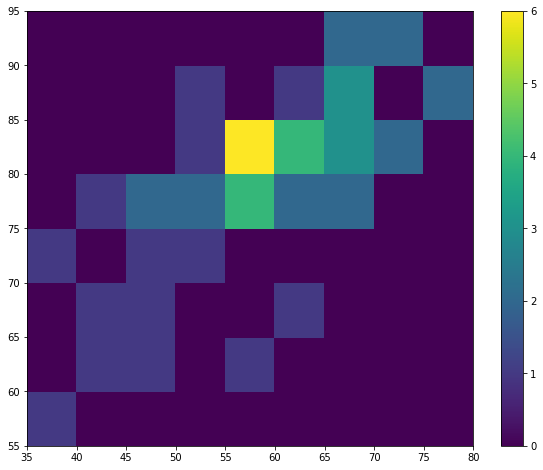

In [31]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores, bins=[9,8], range=[(35,80), (55,95)])
ax.set_xticks(c[1])
ax.set_yticks(c[2])
# カラーバーの表示
fig.colorbar(c[3], ax=ax)
plt.show()